# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Imelda Maretta Putri
- **Email:** imeldamaretta.putri346@gmail.com
- **ID Dicoding:** imeldamp

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi musim terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah hari kerja atau bukan memengaruhi jumlah penyewaan sepeda?
- Bagaimana pengaruh hari libur / holiday pada tiap musim berpengaruh pada penyewaan sepeda?
- Apakah terdapat peningkatan penyewaan sepeda di musim panas saat akhir pekan dibandingkan musim dingin selama hari kerja?

## Import Semua Packages/Library yang Digunakan

Lakukan import semua library yang akan digunakan

In [1]:
from datetime import datetime       # digunakan untuk mengolah data berupa tanggal
import matplotlib.pyplot as plot    # digunakan untuk membuat grafik visual data
import numpy as np                  # digunakan untuk melakukan perhitungan seperti Linear Algebra
import pandas as pd                 # digunakan untuk melakukan  data manipulation dan analisis
import seaborn as ulpipi             # digunakan untuk membuat grafik statistik

## Data Wrangling

### Gathering Data

* Mount Google Drive untuk mengambil dataset dari Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Setelah melakukan mount Google Drive, load semua dataset yang akan digunakan

1. Load Dataset day.csv

In [3]:
data_hari = pd.read_csv("/content/drive/MyDrive/dataset/Bike-sharing-dataset/day.csv") # ubah path sesuai direktori file csv
data_hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Load Dataset hour.csv

In [4]:
data_jam = pd.read_csv("/content/drive/MyDrive/dataset/Bike-sharing-dataset/hour.csv") # ubah path sesuai direktori file csv
data_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv memiliki 16 kolom dan 731 baris.
- Dataset hour.csv memiliki 17 kolom dan 17379 baris.

### Assessing Data

**Informasi Dataset (diambil dari file Readme.txt folder dataset)**

```
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
```

A. Menilai tabel data_hari dari dataset day.csv

1. Cek Tipe Data

In [5]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

- dteday bertipe objek. Hal ini kurang tepat karena dteday merupakan date / tanggal

2. Cek Missing Value

In [6]:
data_hari.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


3. Cek Data Duplikat

In [7]:
print("Jumlah duplikat: ", data_hari.duplicated().sum())

Jumlah duplikat:  0


B. Menilai tabel data_jam dari dataset hour.csv

1. Cek Tipe Data

In [8]:
data_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- dteday bertipe objek. Hal ini kurang tepat karena dteday merupakan date / tanggal

2. Cek Missing Value

In [9]:
data_jam.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Cek Data Duplikat

In [10]:
print("Jumlah duplikat: ", data_jam.duplicated().sum())

Jumlah duplikat:  0


C. Deskripsi

1. Tabel Hari

In [11]:
data_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Tabel Jam

In [12]:
data_jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua tabel tidak memiliki missing value maupun duplikat
- Statistik kedua tabel dalam keadaan normal

### Cleaning Data

1. Menghapus tabel yang tidak digunakan

In [13]:
del data_jam

2. Menghapus kolom yang tidak digunakan

* instant: Tidak memberikan informasi tambahan selain penomoran baris.
* temp: Memberikan informasi suhu dalam Celcius yang dimana tidak ditanyakan dalam Pertanyaan Bisnis.
* atemp:  Memberikan informasi perasaan suhu dalam Celcius yang dimana tidak ditanyakan dalam Pertanyaan Bisnis.
* hum: Informasi seputar humidity / kelembapan, namun tidak ditanyakan dalam Pertanyaan Bisnis.
* windspeed: Informasi seputar kecepatan angin, namun tidak ditanyakan dalam Pertanyaan Bisnis.

In [14]:
data_hari.drop(columns=['instant', 'temp', 'atemp', 'hum', 'windspeed'], inplace=True)

data_hari.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


3. Mengubah value dari beberapa kolom agar lebih mudah dibaca

In [15]:
data_hari['season'] = data_hari['season'].map({
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
})

data_hari['yr'] = data_hari['yr'].map({
    0: '2011',
    1: '2012'
})

data_hari['mnth'] = data_hari['mnth'].map({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
})

data_hari['holiday'] = data_hari['holiday'].map({
    0: 'False',
    1: 'True'
})

data_hari['weekday'] = data_hari['weekday'].map({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jum\'at',
    6: 'Sabtu'
})

data_hari['workingday'] = data_hari['workingday'].map({
    0: 'Weekend',
    1: 'Hari Kerja'
})
data_hari['weathersit'] = data_hari['weathersit'].map({
    1: 'Cerah/Sedikit Berawan',
    2: 'Kabut/Berawan',
    3: 'Salju/Hujan Ringan',
    4: 'Cuaca Buruk'
})

4. Mengubah ke data kategorikal agar bisa diolah

In [16]:
data_hari['season'] = data_hari.season.astype('category')
data_hari['yr'] = data_hari.yr.astype('category')
data_hari['mnth'] = data_hari.mnth.astype('category')
data_hari['holiday'] = data_hari.holiday.astype('category')
data_hari['weekday'] = data_hari.weekday.astype('category')
data_hari['workingday'] = data_hari.workingday.astype('category')
data_hari['weathersit'] = data_hari.weathersit.astype('category')

In [17]:
data_hari.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Semi,2011,Januari,False,Sabtu,Weekend,Kabut/Berawan,331,654,985
1,2011-01-02,Semi,2011,Januari,False,Minggu,Weekend,Kabut/Berawan,131,670,801
2,2011-01-03,Semi,2011,Januari,False,Senin,Hari Kerja,Cerah/Sedikit Berawan,120,1229,1349
3,2011-01-04,Semi,2011,Januari,False,Selasa,Hari Kerja,Cerah/Sedikit Berawan,108,1454,1562
4,2011-01-05,Semi,2011,Januari,False,Rabu,Hari Kerja,Cerah/Sedikit Berawan,82,1518,1600
5,2011-01-06,Semi,2011,Januari,False,Kamis,Hari Kerja,Cerah/Sedikit Berawan,88,1518,1606
6,2011-01-07,Semi,2011,Januari,False,Jum'at,Hari Kerja,Kabut/Berawan,148,1362,1510
7,2011-01-08,Semi,2011,Januari,False,Sabtu,Weekend,Kabut/Berawan,68,891,959
8,2011-01-09,Semi,2011,Januari,False,Minggu,Weekend,Cerah/Sedikit Berawan,54,768,822
9,2011-01-10,Semi,2011,Januari,False,Senin,Hari Kerja,Cerah/Sedikit Berawan,41,1280,1321


5. Mengubah dteday ke tipe data datetime

In [18]:
data_hari['dteday'] = pd.to_datetime(data_hari.dteday)

6. Menampilkan informasi tipe data masing-masing kolom

In [19]:
data_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


**Insight:**
- Tabel data_jam dihapus dikarenakan tidak selaras dengan Pertanyaan Bisnis yang ditanyakan.
- Kolom dteday diubah menjadi tipe data datetime agar memenuhi tujuannya yang semestinya.
- Kolom-kolom lain yang diubah menggunakan function map() dan diubah menjadi tipe data category bertujuan untuk memudahkan dalam membaca, mengolah, dan mengambil keputusan dari data tersebut.

## Exploratory Data Analysis (EDA)

### Explore data_hari

1. Deskripsi umum tabel data_hari

In [20]:
data_hari.describe()

,dteday,casual,registered,cnt
count,731,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,3410.000000,6946.000000,8714.000000
std,NaN,686.622488,1560.256377,1937.211452


2. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Season / Musim

In [21]:
data_hari.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-21-1ad796365a1a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='season').agg({


cnt                   
         max   min         mean
season                         
Dingin  8555    22  4728.162921
Gugur   8714  1115  5644.303191
Panas   8362   795  4992.331522
Semi    7836   431  2604.132597

Dari data diatas didapatkan informasi bahwa pada musim  Gugur, rata-rata penyewaan sepeda memiliki nilai yang paling banyak. Sedangkan pada musim Semi, rata-rata penyewaan sepeda memiliki nilai yang paling sedikit.

3. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Tahun

In [22]:
data_hari.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-22-ed166819e567>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='yr').agg({


cnt                  
       max  min         mean
yr                          
2011  6043  431  3405.761644
2012  8714   22  5599.934426

Didapat informasi bahwa pada tahun 2012 memiliki peningkatan rata-rata penyewaan sepeda yang signifikan.

4. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Bulan

In [23]:
data_hari.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-23-2093ba389b06>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='mnth').agg({


cnt                   
            max   min         mean
mnth                              
Agustus    7865  1115  5664.419355
April      7460   795  4484.900000
Desember   6606   441  3403.806452
Februari   5062  1005  2655.298246
Januari    4521   431  2176.338710
Juli       8173  3285  5563.677419
Juni       8120  3767  5772.366667
Maret      8362   605  3692.258065
Mei        8294  2633  5349.774194
November   6852  1495  4247.183333
Oktober    8156    22  5199.225806
September  8714  1842  5766.516667

Rata-rata terbanyak peminjaman sepeda terjadi pada bulan Juni. Sedangkan rata-rata peminjaman sepeda paling sedikit terjadi pada bulan Januari.

5. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Apakah Liburan atau Bukan

In [24]:
data_hari.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-24-5dcc3cab4693>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='holiday').agg({


cnt                   
          max   min         mean
holiday                         
False    8714    22  4527.104225
True     7403  1000  3735.000000

Pada hari libur, penyewaan sepeda justru lebih kecil daripada peminjaman sepeda pada hari-hari biasa

6. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Hari

In [25]:
data_hari.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-25-fb8cf909bf1c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='weekday').agg({


cnt                   
          max   min         mean
weekday                         
Jum'at   8362  1167  4690.288462
Kamis    7804   431  4667.259615
Minggu   8227   605  4228.828571
Rabu     8173   441  4548.538462
Sabtu    8714   627  4550.542857
Selasa   7767   683  4510.663462
Senin    7525    22  4338.123810

Banyak yang suka menyewa sepeda pada hari Jum'at dibandingkan dengan hari-hari lainnya.

7. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan workingday / Hari Kerja

In [26]:
data_hari.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-26-22b152d68aff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='workingday').agg({


cnt                  
             max  min         mean
workingday                        
Hari Kerja  8362   22  4584.820000
Weekend     8714  605  4330.168831

Rata-rata penyewaan sepeda terbanyak terjadi pada Hari Kerja dibandingkan dengan Weekend

8. Pengelompokkan Jumlah Penyewaan (casual dan registered) Berdasarkan Kondisi Cuaca

In [27]:
data_hari.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-27-69fa277dc4ef>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hari.groupby(by='weathersit').agg({


cnt                  
                        max  min         mean
weathersit                                   
Cerah/Sedikit Berawan  8714  431  4876.786177
Kabut/Berawan          8362  605  4035.862348
Salju/Hujan Ringan     4639   22  1803.285714

Penyewaan sepeda memiliki rata-rata tertinggi pada cuaca cerah atau sedikit berawan. Saat cuaca bersalju atau hujan ringan, penyewaan sepeda justru tidak banyak terjadi penyewaan.

**Insight:**
- Penyewaan sepeda banyak dilakukan pada hari kerja (khususnya hari Jum'at) dibandingkan dengan holiday / hari libur maupun weekend
- Penyewaan sepeda paling banyak terjadi pada bulan Juni. Meski begitu, musim Gugur memiliki nilai rata-rata penyewaan yang paling tinggi.
- Pada tahun kedua (2012) memiliki peningkatan minat dalam penyewaan sepeda dibandingkan pada tahun pertama (2011).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi musim terhadap jumlah penyewaan sepeda?

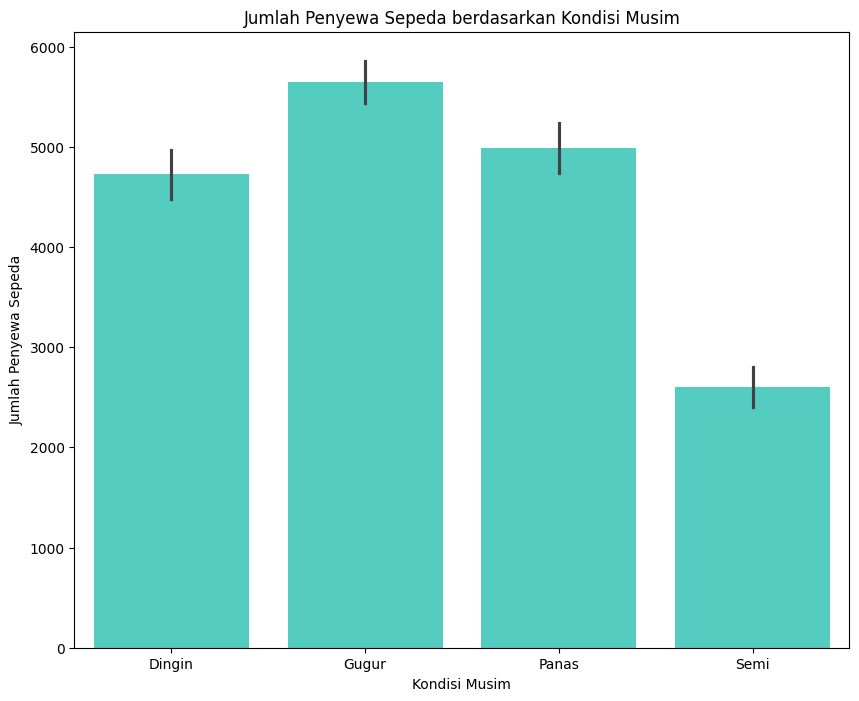

In [28]:
plot.figure(figsize=(10,8))
ulpipi.barplot(
    x='season',
    y='cnt',
    data=data_hari,
    color='turquoise')

plot.title('Jumlah Penyewa Sepeda berdasarkan Kondisi Musim')
plot.xlabel('Kondisi Musim')
plot.ylabel('Jumlah Penyewa Sepeda')
plot.show()

Dari gambar yang kita lihat, jelas bahwa musim sangat mempengaruhi seberapa banyak orang menyewa sepeda. Orang-orang paling suka menyewa sepeda saat musim Gugur, kemudian musim Panas dan Dingin. Tapi, pada musim Semi, jumlah penyewa cenderung lebih sedikit.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

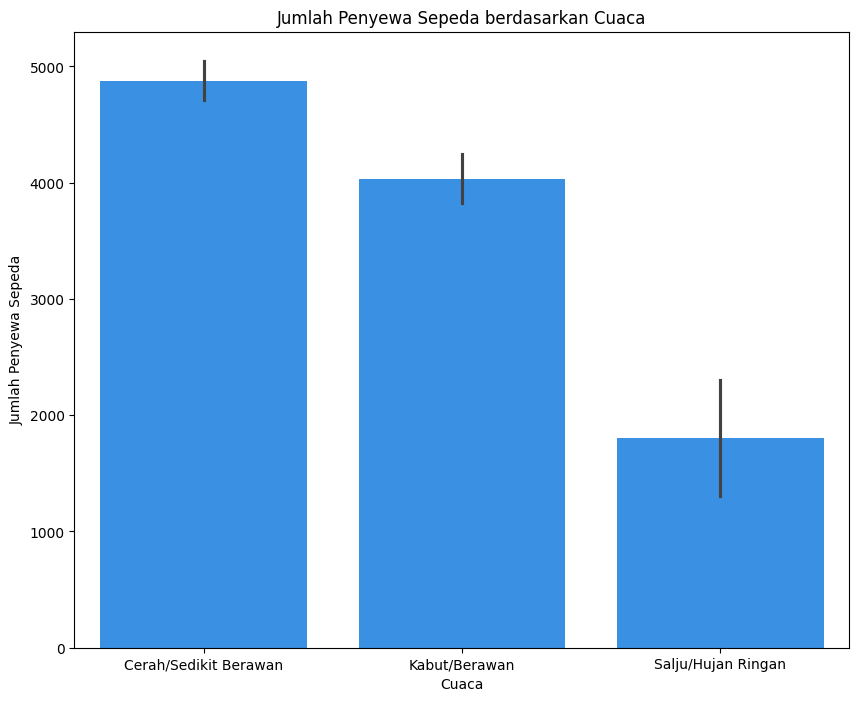

In [29]:
plot.figure(figsize=(10,8))
ulpipi.barplot(
    x='weathersit',
    y='cnt',
    data=data_hari,
    color='dodgerblue')

plot.title('Jumlah Penyewa Sepeda berdasarkan Cuaca')
plot.xlabel('Cuaca')
plot.ylabel('Jumlah Penyewa Sepeda')
plot.show()

Perbedaan yang signifikan terlihat pada rata-rata penyewaan sepeda untuk berbagai kondisi cuaca. Cuaca cerah dan sedikit berawan jelas menjadi favorit, sedangkan cuaca buruk seperti salju atau hujan ringan sangat jarang dipilih oleh para penyewa sepeda.

### Pertanyaan 3: Apakah hari kerja atau bukan memengaruhi jumlah penyewaan sepeda?

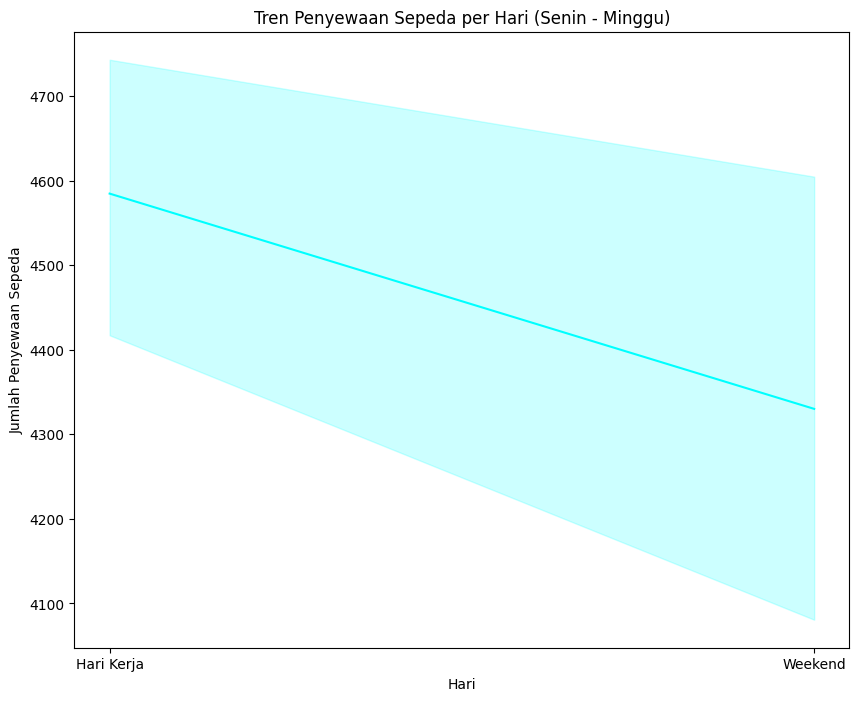

In [30]:
plot.figure(figsize=(10,8))
ulpipi.lineplot(
    x='workingday',
    y='cnt',
    data=data_hari,
    color='aqua')

plot.title('Tren Penyewaan Sepeda per Hari (Senin - Minggu)')
plot.xlabel('Hari')
plot.ylabel('Jumlah Penyewaan Sepeda')
plot.show()

Terlihat dari line chart diatas, tren penyewaan sepeda yang dimulai pada Hari Kerja terus melakukan penurunan tren menuju Weekend.

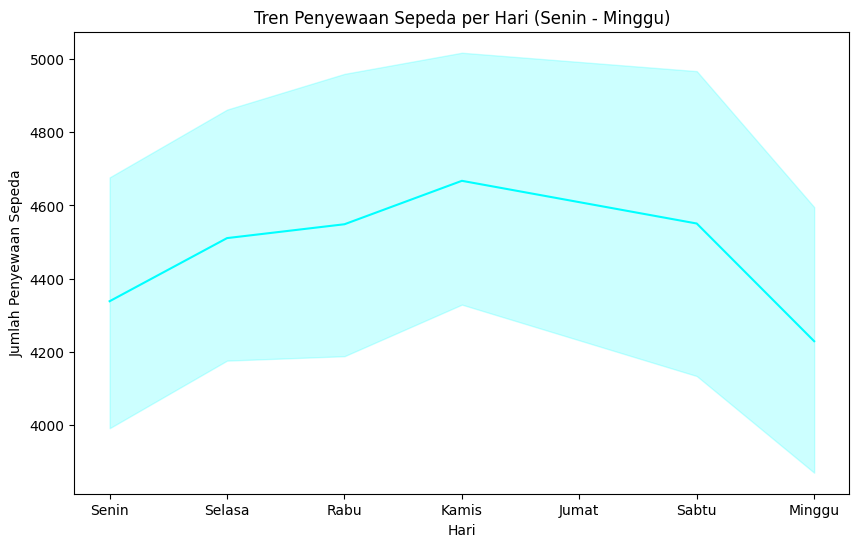

In [31]:
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
data_hari['weekday'] = pd.Categorical(data_hari['weekday'], categories=urutan_hari, ordered=True)

plot.figure(figsize=(10,6))
ulpipi.lineplot(
    x='weekday',
    y='cnt',
    data=data_hari,
    color='aqua')

plot.title('Tren Penyewaan Sepeda per Hari (Senin - Minggu)')
plot.xlabel('Hari')
plot.ylabel('Jumlah Penyewaan Sepeda')
plot.show()

Diperjelas dengan line chart yang memperlihatkan secara lebih detail tren penyewaan sepeda berdasarkan hari. Terlihat dari line chart diatas, tren penyewaan sepeda yang dimulai pada hari Senin terus melakukan kenaikan tren hingga hari Jum'at yang dimana selama 5 hari tersebut merupakan hari kerja. Sedangkan, line chart terlihat menurun pada hari Sabtu hingga Minggu (yang dimana kedua hari tersebut bukanlah hari kerja / weekend)

### Pertanyaan 4: Bagaimana pengaruh hari libur / holiday pada tiap musim berpengaruh pada penyewaan sepeda?

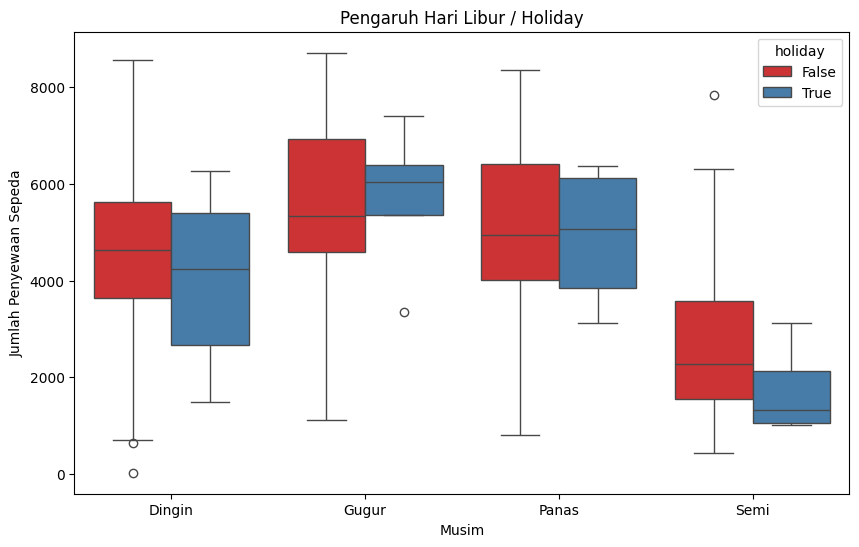

In [32]:
plot.figure(figsize=(10,6))
ulpipi.boxplot(
    x='season',
    y='cnt',
    hue='holiday',
    data=data_hari,
    palette='Set1'
)

plot.title('Pengaruh Hari Libur / Holiday')
plot.xlabel('Musim')
plot.ylabel('Jumlah Penyewaan Sepeda')
plot.show()

Tingkat penyewaan sepeda pada hari libur menunjukkan fluktuasi yang signifikan antar musim. Musim gugur mencatat peningkatan yang paling menonjol, sementara musim semi mengalami penurunan paling drastis. Sebaliknya, musim panas dan dingin cenderung memiliki tingkat penyewaan yang lebih stabil, baik pada hari libur maupun hari biasa. Secara keseluruhan, variabilitas penyewaan cenderung lebih rendah pada hari libur di semua musim.

### Pertanyaan 5: Apakah terdapat peningkatan penyewaan sepeda di musim panas saat weekend dibandingkan musim dingin selama hari kerja?



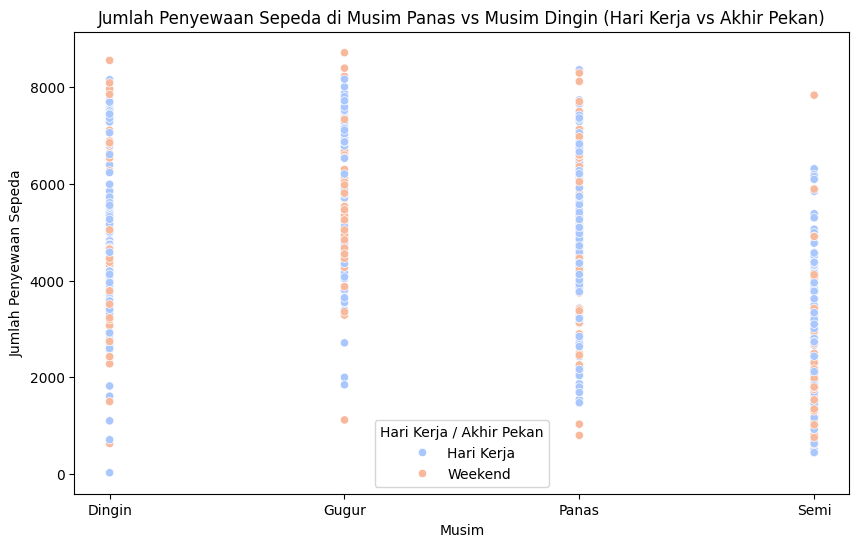

In [33]:
plot.figure(figsize=(10, 6))

ulpipi.scatterplot(
    x='season',
    y='cnt',
    hue='workingday',
    data=data_hari,
    palette='coolwarm')
plot.title('Jumlah Penyewaan Sepeda di Musim Panas vs Musim Dingin (Hari Kerja vs Akhir Pekan)')
plot.xlabel('Musim')
plot.ylabel('Jumlah Penyewaan Sepeda')
plot.legend(title='Hari Kerja / Akhir Pekan')
plot.show()

Data scatter plot menunjukkan bahwa kombinasi antara musim panas dan akhir pekan mendorong peningkatan permintaan terhadap layanan penyewaan sepeda. Terlihat bahwa penyewaan sepeda pada musim panas saat weekend memiliki nilai yang lebih besar daripada saat musim dingin pada hari kerja.

**Insight:**
- Hari kerja / weekend memiliki peran yang siginifikan terhadap penyewaan sepeda diman pada hari kerja penyewaan sepeda bisa meningkat.
- Begitu pula dengan holiday, penyewaan lebih sering dilakukan pada hari bukan hari libr dibandingkan dengan hari libur itu sendiri.
- Musim dan cuaca juga memiliki pengaruh pada penyewaan sepeda dimana musim gugur menjadi favorit dan cuaca cerah menjadi primadona penyewa sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1: Bagaimana pengaruh kondisi musim terhadap jumlah penyewaan sepeda?


> Penyewa sepeda lebih suka melakukan penyewaan sepeda terbukti dari banyaknya nilai mean terbesar daripada musim lain, yaitu sebesar 5644.303191.


- Conclusion Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?


> Cuaca cerah/sedikit berawan lebih diminati para penyewa sepeda. Dibuktikan dengan terbesarnya nilai mean sebesar 4876.786177

- Conclusion Pertanyaan 3: Apakah hari kerja atau bukan memengaruhi jumlah penyewaan sepeda?


> Hari kerja atau weekend juga memengaruhi jumlah penyewaan sepeda. Diperlihatkan pada Line plot bahwa jumlah penyewa sepeda mulai hari Senin terus meningkat hingga hari Jum'at dan mulai turun pada hari Sabtu ke hari Minggu.

- Conclusion Pertanyaan 4: Bagaimana pengaruh hari libur / holiday pada tiap musim berpengaruh pada penyewaan sepeda?

> Musim gugur menjadi periode dengan tingkat penyewaan tertinggi, sementara musim semi mengalami penurunan paling drastis. Musim panas dan dingin cenderung lebih stabil. Secara keseluruhan, hari libur cenderung menstabilkan permintaan penyewaan sepeda di semua musim. Hal ini mengindikasikan bahwa faktor non-musiman seperti liburan bersama juga turut berperan dalam mempengaruhi tingkat penyewaan.

- Conclusion Pertanyaan 5: Apakah terdapat peningkatan penyewaan sepeda di musim panas saat weekend dibandingkan musim dingin selama hari kerja?

> Data menunjukkan bahwa kombinasi antara musim panas dan akhir pekan mendorong peningkatan permintaan terhadap layanan penyewaan sepeda. Kemungkinan besar, faktor cuaca yang cerah dan waktu luang yang lebih banyak pada akhir pekan menjadi daya tarik utama.



In [34]:
data_hari.to_csv("fixed_dataset.csv", index=False)